In [25]:
import ants
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [4]:

fi = ants.image_read( ants.get_ants_data( 'r16' ) )
mi = ants.image_read( ants.get_ants_data( 'r64' ) )
mygr = ants.create_warped_grid( mi )
mytx = ants.registration(fixed=fi, moving=mi, type_of_transform = ('SyN'))
mywarpedgrid = ants.create_warped_grid( mi, grid_directions=(False,True),
                        transform=mytx['fwdtransforms'], fixed_reference_image=fi )
mywarpeimage = ants.apply_transforms( fixed=fi, moving=mi,transformlist=mytx['fwdtransforms'] )

Text(0.5, 1.0, 'Grille déformé')

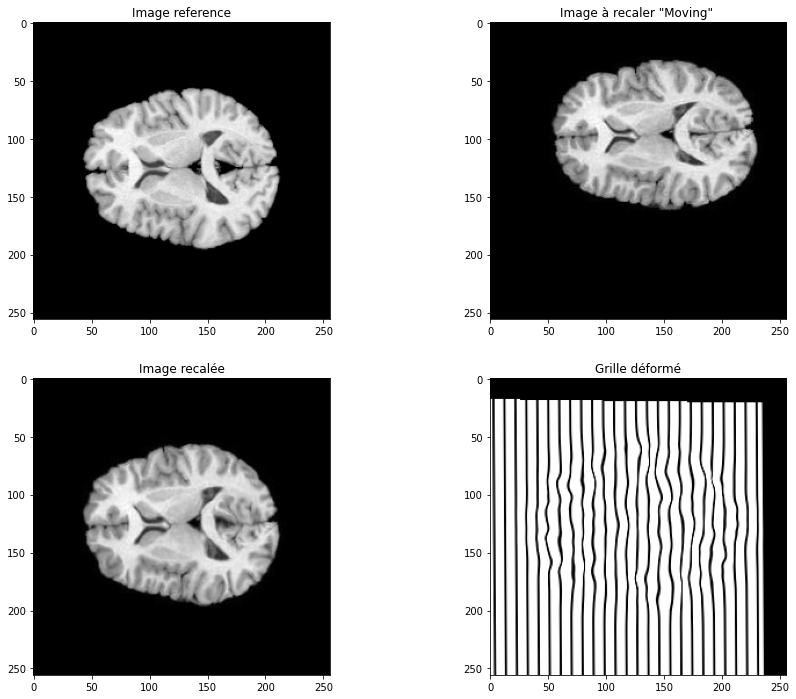

In [5]:
plt.figure(figsize = (15,12))
plt.subplot(2,2,1)
plt.imshow(fi.numpy(), cmap = cm.gray)
plt.title('Image reference')
plt.subplot(2,2,2)
plt.imshow(mi.numpy(), cmap = cm.gray)
plt.title('Image à recaler "Moving" ')
plt.subplot(2,2,3)
plt.imshow(mywarpeimage.numpy(), cmap = cm.gray)
plt.title('Image recalée')
plt.subplot(2,2,4)
plt.imshow(mywarpedgrid.numpy(), cmap = cm.gray)
plt.title('Grille déformé')

Text(0.5, 1.0, 'Grille déformé')

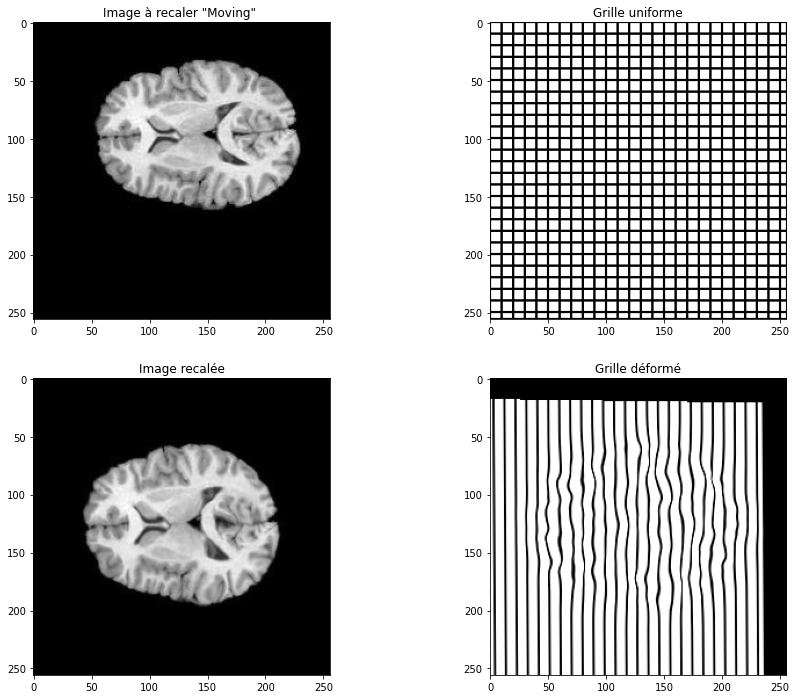

In [6]:
plt.figure(figsize = (15,12))
plt.subplot(2,2,1)
plt.imshow(mi.numpy(), cmap = cm.gray)
plt.title('Image à recaler "Moving" ')
plt.subplot(2,2,2)
plt.imshow(mygr.numpy(), cmap = cm.gray)
plt.title('Grille uniforme')
plt.subplot(2,2,3)
plt.imshow(mywarpeimage.numpy(), cmap = cm.gray)
plt.title('Image recalée')
plt.subplot(2,2,4)
plt.imshow(mywarpedgrid.numpy(), cmap = cm.gray)
plt.title('Grille déformé')

In [93]:
def histo2D(img_target,img_moving,bins=20):
    hist_2d, x_edges, y_edges = np.histogram2d(img_target.ravel(), img_moving.ravel(), bins)
    return hist_2d

def mutual_information(hgram):
    pxy = hgram/float(np.sum(hgram))
    px = np.sum(pxy, axis = 1)
    py = np.sum(pxy, axis = 0)
    px_py = px[:, None] * py[:, None]
    nzs = pxy > 0
    return np.sum(pxy[nzs] * np.log(pxy[nzs] / px_py[nzs]))

def MI(img_target,img_moving):
    MI = mutual_information(histo2D(img_target, img_moving))
    return MI

def SSD(img_target,img_moving):
    SSD = ((img_target - img_moving)**2).sum()
    return SSD

def correlation(img_target,img_moving):
    return np.corrcoef(img_target.ravel(),img_moving.ravel())[0,1]

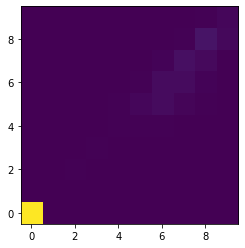

In [30]:
H_before = histo2D(fi.numpy(),mi.numpy(),bins=20)
H_after = histo2D(fi.numpy(),mywarpeimage.numpy(),bins=10)
plt.imshow(H_after.T, origin = 'lower')

In [33]:
print('SSD avant recallage  = {}'.format(SSD(fi.numpy(), mi.numpy())))
print('SSD après recallage  = {}'.format(SSD(fi.numpy(), mywarpeimage.numpy())))

SSD avant recallage  = 387908864.0
SSD après recallage  = 14306368.0


In [34]:
print('CC avant recallage  = {}'.format(correlation(fi.numpy(), mi.numpy())))
print('CC après recallage  = {}'.format(correlation(fi.numpy(), mywarpeimage.numpy())))

CC avant recallage  = 0.5657720377915795
CC après recallage  = 0.9862044367886039


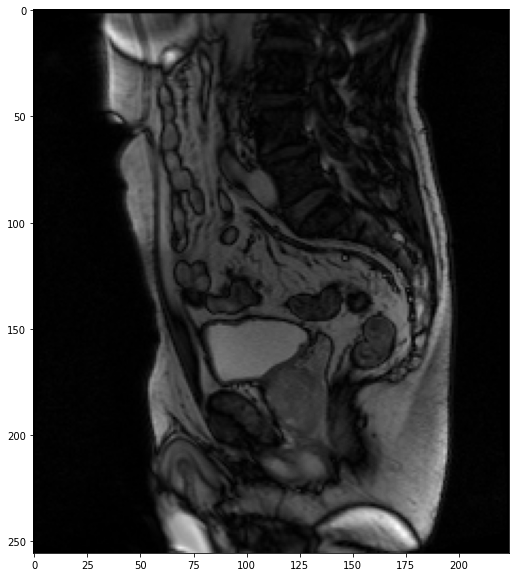

In [66]:
from pydicom import dcmread
fixed_image = dcmread("2/Anonymat.Seq2.Ser2.Img12.dcm")
plt.figure(figsize = (10,10))
plt.imshow(fixed_image.pixel_array,cmap='gray')

In [67]:
from PIL import Image


image_path = '2/Anonymat.Seq2.Ser2.Img12.dcm'
ds = dcmread(image_path)

new_image = ds.pixel_array.astype(float)

scaled_image = (np.maximum(new_image, 0) / new_image.max()) * 255.0

scaled_image = np.uint8(scaled_image)
final_image = Image.fromarray(scaled_image)

final_image.show()

final_image.save('IRM_mi_4.jpg')

#### Recalage de 0 sur 1

In [98]:
fi = Image.open('IRM_mi_1.jpg')
mi = Image.open('IRM_mi_0.jpg')

from numpy import asarray
numpyfi = asarray(fi)
numpymi = asarray(mi)
print(type(numpyfi))



<class 'numpy.ndarray'>


In [99]:
fi = ants.from_numpy(numpyfi, None, None, None, False, False)
mi = ants.from_numpy(numpymi, None, None, None, False, False)

mytx = ants.registration(fixed = fi, moving = mi, type_of_transfrom = 'SyN')

In [100]:

#fi = ants.image_read( ants.get_ants_data( numpyfi ) )
#mi = ants.image_read( ants.get_ants_data( numpymi ) )
mygr = ants.create_warped_grid( mi )
mytx = ants.registration(fixed=fi, moving=mi, type_of_transform = ('SyN'))
mywarpedgrid = ants.create_warped_grid( mi, grid_directions=(False,True),
                        transform=mytx['fwdtransforms'], fixed_reference_image=fi )
mywarpeimage = ants.apply_transforms( fixed=fi, moving=mi,transformlist=mytx['fwdtransforms'] )

Text(0.5, 1.0, 'Grille déformé')

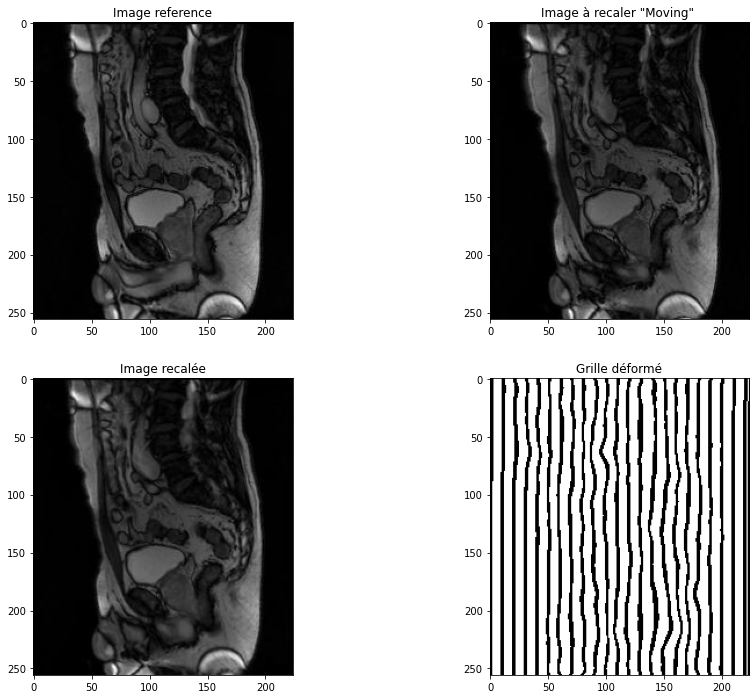

In [101]:
plt.figure(figsize = (15,12))
plt.subplot(2,2,1)
plt.imshow(fi.numpy(), cmap = cm.gray)
plt.title('Image reference')
plt.subplot(2,2,2)
plt.imshow(mi.numpy(), cmap = cm.gray)
plt.title('Image à recaler "Moving" ')
plt.subplot(2,2,3)
plt.imshow(mywarpeimage.numpy(), cmap = cm.gray)
plt.title('Image recalée')
plt.subplot(2,2,4)
plt.imshow(mywarpedgrid.numpy(), cmap = cm.gray)
plt.title('Grille déformé')

Text(0.5, 1.0, 'Grille déformé')

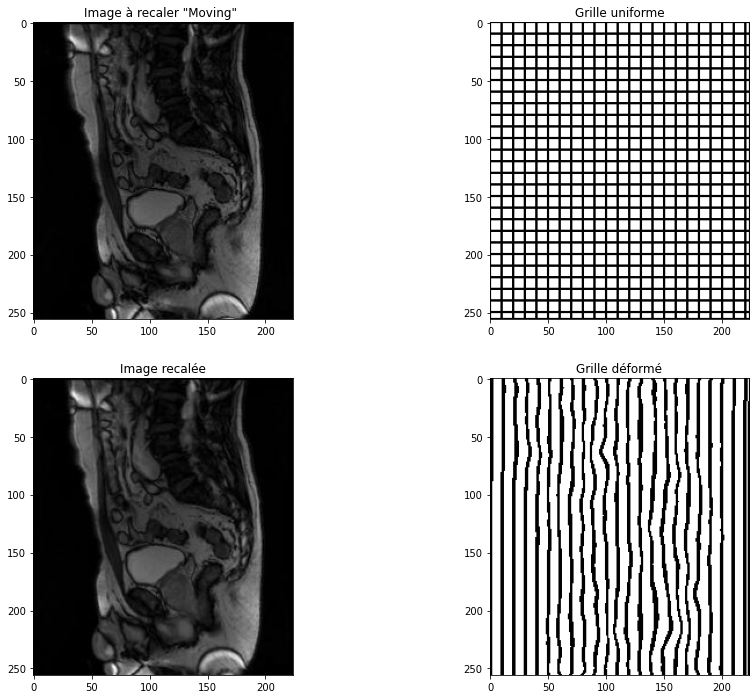

In [102]:
plt.figure(figsize = (15,12))
plt.subplot(2,2,1)
plt.imshow(mi.numpy(), cmap = cm.gray)
plt.title('Image à recaler "Moving" ')
plt.subplot(2,2,2)
plt.imshow(mygr.numpy(), cmap = cm.gray)
plt.title('Grille uniforme')
plt.subplot(2,2,3)
plt.imshow(mywarpeimage.numpy(), cmap = cm.gray)
plt.title('Image recalée')
plt.subplot(2,2,4)
plt.imshow(mywarpedgrid.numpy(), cmap = cm.gray)
plt.title('Grille déformé')

In [103]:
print('CC avant recallage  = {}'.format(correlation(fi.numpy(), mi.numpy())))
print('CC après recallage  = {}'.format(correlation(fi.numpy(), mywarpeimage.numpy())))

CC avant recallage  = 0.8820096709178393
CC après recallage  = 0.9348831174739068


In [104]:
cv.imwrite('reg_0_1.jpg', mywarpeimage.numpy())

True

#### Recalage de 4 sur 3

In [105]:
fi = Image.open('IRM_mi_3.jpg')
mi = Image.open('IRM_mi_4.jpg')

from numpy import asarray
numpyfi = asarray(fi)
numpymi = asarray(mi)
print(type(numpyfi))


fi = ants.from_numpy(numpyfi, None, None, None, False, False)
mi = ants.from_numpy(numpymi, None, None, None, False, False)

mytx = ants.registration(fixed = fi, moving = mi, type_of_transfrom = 'SyN')

mygr = ants.create_warped_grid( mi )
mytx = ants.registration(fixed=fi, moving=mi, type_of_transform = ('SyN'))
mywarpedgrid = ants.create_warped_grid( mi, grid_directions=(False,True),
                        transform=mytx['fwdtransforms'], fixed_reference_image=fi )
mywarpeimage = ants.apply_transforms( fixed=fi, moving=mi,transformlist=mytx['fwdtransforms'] )

<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Grille déformé')

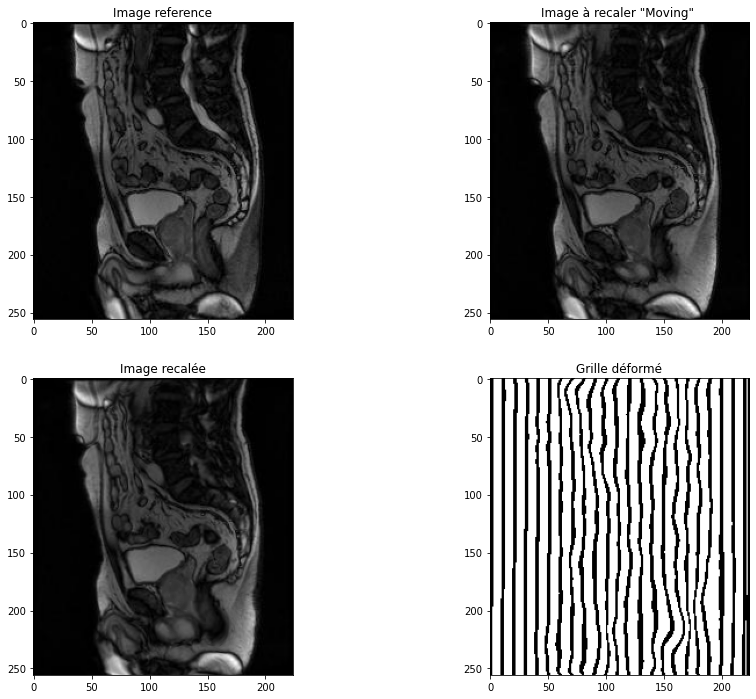

In [106]:
plt.figure(figsize = (15,12))
plt.subplot(2,2,1)
plt.imshow(fi.numpy(), cmap = cm.gray)
plt.title('Image reference')
plt.subplot(2,2,2)
plt.imshow(mi.numpy(), cmap = cm.gray)
plt.title('Image à recaler "Moving" ')
plt.subplot(2,2,3)
plt.imshow(mywarpeimage.numpy(), cmap = cm.gray)
plt.title('Image recalée')
plt.subplot(2,2,4)
plt.imshow(mywarpedgrid.numpy(), cmap = cm.gray)
plt.title('Grille déformé')

In [107]:
print('CC avant recallage  = {}'.format(correlation(fi.numpy(), mi.numpy())))
print('CC après recallage  = {}'.format(correlation(fi.numpy(), mywarpeimage.numpy())))

CC avant recallage  = 0.8116357494350708
CC après recallage  = 0.8712348532060435


In [108]:
cv.imwrite('reg_4_3.jpg', mywarpeimage.numpy())

True

#### Recalage de resultat de {0 sur 1} sur 2 

In [109]:
fi = Image.open('IRM_fi.jpg')
mi = Image.open('reg_0_1.jpg')

from numpy import asarray
numpyfi = asarray(fi)
numpymi = asarray(mi)
print(type(numpyfi))


fi = ants.from_numpy(numpyfi, None, None, None, False, False)
mi = ants.from_numpy(numpymi, None, None, None, False, False)

mytx = ants.registration(fixed = fi, moving = mi, type_of_transfrom = 'SyN')

mygr = ants.create_warped_grid( mi )
mytx = ants.registration(fixed=fi, moving=mi, type_of_transform = ('SyN'))
mywarpedgrid = ants.create_warped_grid( mi, grid_directions=(False,True),
                        transform=mytx['fwdtransforms'], fixed_reference_image=fi )
mywarpeimage = ants.apply_transforms( fixed=fi, moving=mi,transformlist=mytx['fwdtransforms'] )

<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Grille déformé')

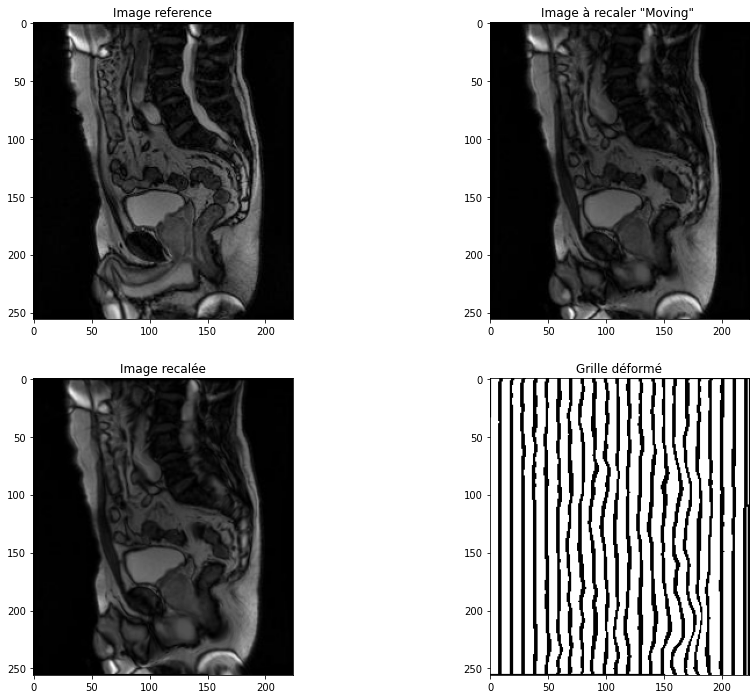

In [110]:
plt.figure(figsize = (15,12))
plt.subplot(2,2,1)
plt.imshow(fi.numpy(), cmap = cm.gray)
plt.title('Image reference')
plt.subplot(2,2,2)
plt.imshow(mi.numpy(), cmap = cm.gray)
plt.title('Image à recaler "Moving" ')
plt.subplot(2,2,3)
plt.imshow(mywarpeimage.numpy(), cmap = cm.gray)
plt.title('Image recalée')
plt.subplot(2,2,4)
plt.imshow(mywarpedgrid.numpy(), cmap = cm.gray)
plt.title('Grille déformé')

In [111]:
print('CC avant recallage  = {}'.format(correlation(fi.numpy(), mi.numpy())))
print('CC après recallage  = {}'.format(correlation(fi.numpy(), mywarpeimage.numpy())))

CC avant recallage  = 0.8094325854840719
CC après recallage  = 0.8729187914852232


In [112]:
cv.imwrite('reg_{0,1}_2.jpg', mywarpeimage.numpy())

True

#### Recalage de resultat de {4 sur 3} sur 2 

In [113]:
fi = Image.open('IRM_fi.jpg')
mi = Image.open('reg_4_3.jpg')

from numpy import asarray
numpyfi = asarray(fi)
numpymi = asarray(mi)
print(type(numpyfi))


fi = ants.from_numpy(numpyfi, None, None, None, False, False)
mi = ants.from_numpy(numpymi, None, None, None, False, False)

mytx = ants.registration(fixed = fi, moving = mi, type_of_transfrom = 'SyN')

mygr = ants.create_warped_grid( mi )
mytx = ants.registration(fixed=fi, moving=mi, type_of_transform = ('SyN'))
mywarpedgrid = ants.create_warped_grid( mi, grid_directions=(False,True),
                        transform=mytx['fwdtransforms'], fixed_reference_image=fi )
mywarpeimage = ants.apply_transforms( fixed=fi, moving=mi,transformlist=mytx['fwdtransforms'] )

<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Grille déformé')

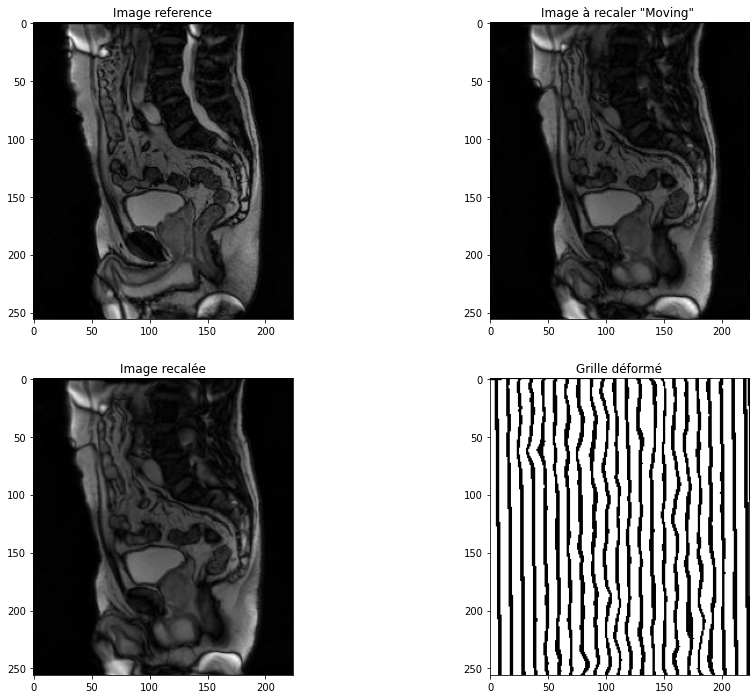

In [114]:
plt.figure(figsize = (15,12))
plt.subplot(2,2,1)
plt.imshow(fi.numpy(), cmap = cm.gray)
plt.title('Image reference')
plt.subplot(2,2,2)
plt.imshow(mi.numpy(), cmap = cm.gray)
plt.title('Image à recaler "Moving" ')
plt.subplot(2,2,3)
plt.imshow(mywarpeimage.numpy(), cmap = cm.gray)
plt.title('Image recalée')
plt.subplot(2,2,4)
plt.imshow(mywarpedgrid.numpy(), cmap = cm.gray)
plt.title('Grille déformé')

In [115]:
print('CC avant recallage  = {}'.format(correlation(fi.numpy(), mi.numpy())))
print('CC après recallage  = {}'.format(correlation(fi.numpy(), mywarpeimage.numpy())))

CC avant recallage  = 0.7585797954947835
CC après recallage  = 0.8638985680351943


In [116]:
cv.imwrite('reg_{4,3}_2.jpg', mywarpeimage.numpy())

True

#### Recalage de resultat final 


In [117]:
fi = Image.open('reg_{4,3}_2.jpg')
mi = Image.open('reg_{0,1}_2.jpg')

from numpy import asarray
numpyfi = asarray(fi)
numpymi = asarray(mi)
print(type(numpyfi))


fi = ants.from_numpy(numpyfi, None, None, None, False, False)
mi = ants.from_numpy(numpymi, None, None, None, False, False)

mytx = ants.registration(fixed = fi, moving = mi, type_of_transfrom = 'SyN')

mygr = ants.create_warped_grid( mi )
mytx = ants.registration(fixed=fi, moving=mi, type_of_transform = ('SyN'))
mywarpedgrid = ants.create_warped_grid( mi, grid_directions=(False,True),
                        transform=mytx['fwdtransforms'], fixed_reference_image=fi )
mywarpeimage = ants.apply_transforms( fixed=fi, moving=mi,transformlist=mytx['fwdtransforms'] )

<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Grille déformé')

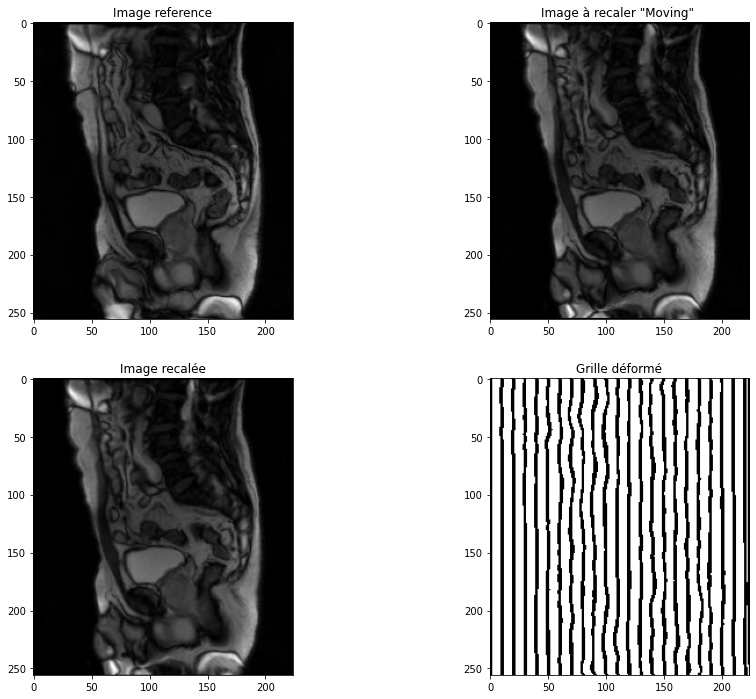

In [118]:
plt.figure(figsize = (15,12))
plt.subplot(2,2,1)
plt.imshow(fi.numpy(), cmap = cm.gray)
plt.title('Image reference')
plt.subplot(2,2,2)
plt.imshow(mi.numpy(), cmap = cm.gray)
plt.title('Image à recaler "Moving" ')
plt.subplot(2,2,3)
plt.imshow(mywarpeimage.numpy(), cmap = cm.gray)
plt.title('Image recalée')
plt.subplot(2,2,4)
plt.imshow(mywarpedgrid.numpy(), cmap = cm.gray)
plt.title('Grille déformé')

In [119]:
cv.imwrite('reg_final.jpg', mywarpeimage.numpy())

True

In [120]:
print('CC avant recallage  = {}'.format(correlation(fi.numpy(), mi.numpy())))
print('CC après recallage  = {}'.format(correlation(fi.numpy(), mywarpeimage.numpy())))

CC avant recallage  = 0.8941476788341958
CC après recallage  = 0.9216952599562759


#### Recalage de resultat de 1 sur 3 


In [170]:
fi = Image.open('IRM_mi_1.jpg')
mi = Image.open('IRM_mi_3.jpg')

from numpy import asarray
numpyfi = asarray(fi)
numpymi = asarray(mi)
print(type(numpyfi))


fi = ants.from_numpy(numpyfi, None, None, None, False, False)
mi = ants.from_numpy(numpymi, None, None, None, False, False)

mytx = ants.registration(fixed = fi, moving = mi, type_of_transfrom = 'SyN')

mygr = ants.create_warped_grid( mi )
mytx = ants.registration(fixed=fi, moving=mi, type_of_transform = ('SyN'))
mywarpedgrid = ants.create_warped_grid( mi, grid_directions=(False,True),
                        transform=mytx['fwdtransforms'], fixed_reference_image=fi )
mywarpeimage = ants.apply_transforms( fixed=fi, moving=mi,transformlist=mytx['fwdtransforms'] )

<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Grille déformé')

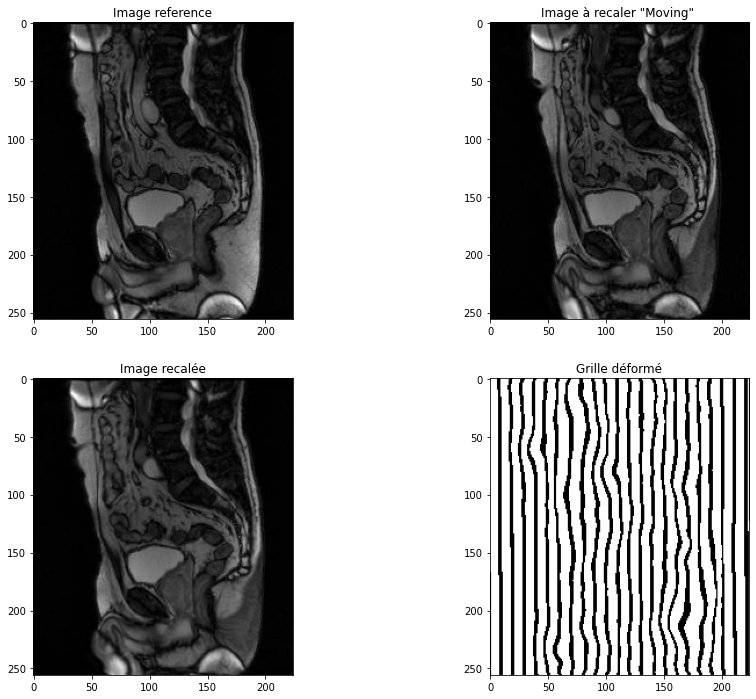

In [171]:
plt.figure(figsize = (15,12))
plt.subplot(2,2,1)
plt.imshow(fi.numpy(), cmap = cm.gray)
plt.title('Image reference')
plt.subplot(2,2,2)
plt.imshow(mi.numpy(), cmap = cm.gray)
plt.title('Image à recaler "Moving" ')
plt.subplot(2,2,3)
plt.imshow(mywarpeimage.numpy(), cmap = cm.gray)
plt.title('Image recalée')
plt.subplot(2,2,4)
plt.imshow(mywarpedgrid.numpy(), cmap = cm.gray)
plt.title('Grille déformé')

In [172]:
print('CC avant recallage  = {}'.format(correlation(fi.numpy(), mi.numpy())))
print('CC après recallage  = {}'.format(correlation(fi.numpy(), mywarpeimage.numpy())))

CC avant recallage  = 0.7593762418820715
CC après recallage  = 0.8499620186243199


### Effet du cropping sur le metric du recalage 

In [173]:
def crop(img_target,x,y,w,h):
    img_crop = img_target[y:y+h, x:x+h]
    return img_crop

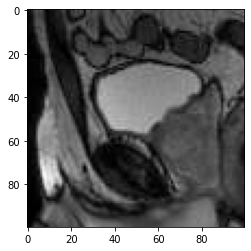

In [174]:
crop_fi = crop(fi, 50, 120, 100, 100)
plt.imshow(crop_fi, cmap = cm.gray)

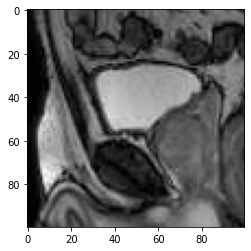

In [175]:
crop_mi = crop(mi, 50, 120, 100, 100)
plt.imshow(crop_mi, cmap = cm.gray)

In [176]:
fi = crop_fi
mi = crop_mi

from numpy import asarray
numpyfi = asarray(fi)
numpymi = asarray(mi)
print(type(numpyfi))


fi = ants.from_numpy(numpyfi, None, None, None, False, False)
mi = ants.from_numpy(numpymi, None, None, None, False, False)

mytx = ants.registration(fixed = fi, moving = mi, type_of_transfrom = 'ElasticSyN')

mygr = ants.create_warped_grid( mi )
mytx = ants.registration(fixed=fi, moving=mi, type_of_transform = ('ElasticSyN'))
mywarpedgrid = ants.create_warped_grid( mi, grid_directions=(False,True),
                        transform=mytx['fwdtransforms'], fixed_reference_image=fi )
mywarpeimage = ants.apply_transforms( fixed=fi, moving=mi,transformlist=mytx['fwdtransforms'] )

<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Grille déformé')

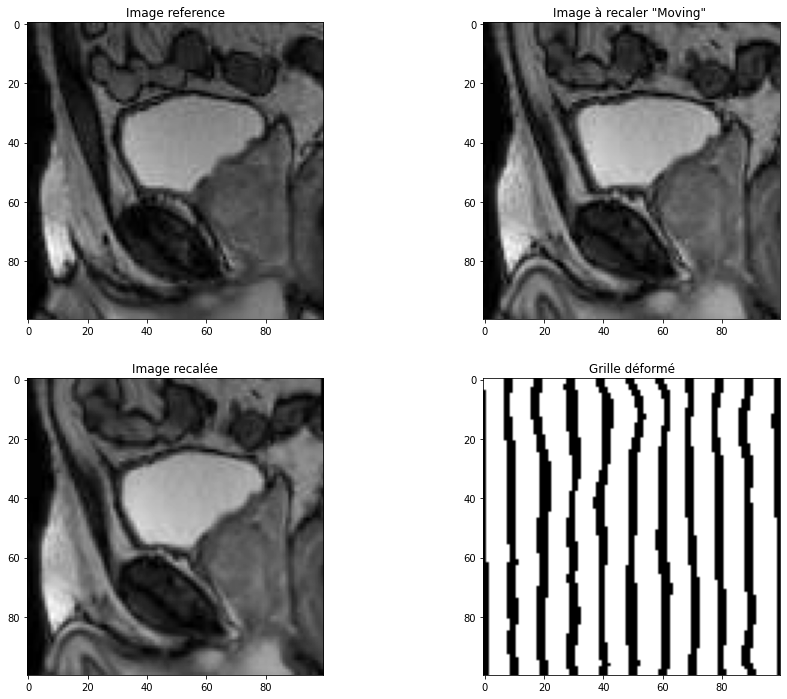

In [177]:
plt.figure(figsize = (15,12))
plt.subplot(2,2,1)
plt.imshow(fi.numpy(), cmap = cm.gray)
plt.title('Image reference')
plt.subplot(2,2,2)
plt.imshow(mi.numpy(), cmap = cm.gray)
plt.title('Image à recaler "Moving" ')
plt.subplot(2,2,3)
plt.imshow(mywarpeimage.numpy(), cmap = cm.gray)
plt.title('Image recalée')
plt.subplot(2,2,4)
plt.imshow(mywarpedgrid.numpy(), cmap = cm.gray)
plt.title('Grille déformé')

In [178]:
print('CC avant recallage  = {}'.format(correlation(fi.numpy(), mi.numpy())))
print('CC après recallage  = {}'.format(correlation(fi.numpy(), mywarpeimage.numpy())))

CC avant recallage  = 0.8235829726938502
CC après recallage  = 0.8745759601759147


##### typeofTransform can be one of:
“Translation”: Translation transformation.
“Rigid”: Rigid transformation: Only rotation and translation.
“Similarity”: Similarity transformation: scaling, rotation and translation.
“QuickRigid”: Rigid transformation: Only rotation and translation.
May be useful for quick visualization fixes.’
“DenseRigid”: Rigid transformation: Only rotation and translation.
Employs dense sampling during metric estimation.’
“BOLDRigid”: Rigid transformation: Parameters typical for BOLD to
BOLD intrasubject registration’.’
“Affine”: Affine transformation: Rigid + scaling.
“AffineFast”: Fast version of Affine.
“BOLDAffine”: Affine transformation: Parameters typical for BOLD to
BOLD intrasubject registration’.’
“TRSAA”: translation, rigid, similarity, affine (twice). please set
regIterations if using this option. this would be used in cases where you want a really high quality affine mapping (perhaps with mask).
“ElasticSyN”: Symmetric normalization: Affine + deformable
transformation, with mutual information as optimization metric and elastic regularization.
“SyN”: Symmetric normalization: Affine + deformable transformation,
with mutual information as optimization metric.
“SyNRA”: Symmetric normalization: Rigid + Affine + deformable
transformation, with mutual information as optimization metric.
“SyNOnly”: Symmetric normalization: no initial transformation,
with mutual information as optimization metric. Assumes images are aligned by an inital transformation. Can be useful if you want to run an unmasked affine followed by masked deformable registration.
“SyNCC”: SyN, but with cross-correlation as the metric.
“SyNabp”: SyN optimized for abpBrainExtraction.
“SyNBold”: SyN, but optimized for registrations between BOLD and T1 images.
“SyNBoldAff”: SyN, but optimized for registrations between BOLD
and T1 images, with additional affine step.
“SyNAggro”: SyN, but with more aggressive registration
(fine-scale matching and more deformation). Takes more time than SyN.
“TVMSQ”: time-varying diffeomorphism with mean square metric
“TVMSQC”: time-varying diffeomorphism with mean square metric for very large deformation